In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_pickle('snr_paper_data.pickle')

In [5]:
print(data)

{'test': {(2, 4):             x       y    thickness     snr  mask          smb   surf_temp  \
0    -1794500  131000   755.947754     NaN     2  1347.644531  260.118571   
1    -1794500  126000   795.775391     NaN     2  1347.644531  260.118571   
2    -1794500  121000   986.484802     NaN     2  1347.644531  260.118571   
3    -1794500  116000  1074.349243     NaN     2  1347.644531  260.118571   
4    -1794500  111000   911.056763     NaN     2  1347.644531  260.118571   
...       ...     ...          ...     ...   ...          ...         ...   
9819 -1299500 -344000  2845.820312     NaN     2   492.040924  256.893307   
9820 -1299500 -349000  2878.579590     NaN     2   492.040924  256.893307   
9821 -1299500 -354000  2775.646973     NaN     2   492.040924  256.893307   
9822 -1299500 -359000  2474.384033 -81.465     2   492.040924  256.893307   
9823 -1299500 -364000  2389.736328 -78.602     2   492.040924  256.893307   

       base_temp   atten         vx         vy          v

In [11]:
data.keys()

dict_keys(['test', 'folds', 'all_data'])

In [41]:
full_df = data['all_data'].loc[(~np.isnan(data['all_data']['snr'])) & 
                               (~np.isnan(data['all_data']['thickness'])) &
                               (~np.isnan(data['all_data']['surf_temp'])) &
                               (~np.isnan(data['all_data']['base_temp'])) &
                               (~np.isnan(data['all_data']['v'])) &
                               (~np.isnan(data['all_data']['atten']))
                              ]

In [42]:
full_df.columns

Index(['x', 'y', 'thickness', 'snr', 'mask', 'smb', 'surf_temp', 'base_temp',
       'atten', 'vx', 'vy', 'v'],
      dtype='object')

In [88]:
model_df = full_df[['snr', 'thickness', 'surf_temp', 
                    'base_temp', 'mask', 'x','y', 'v']]

#in the mask 2 is grounded ice, and 3 is floating ice

In [89]:
model_df['log_v'] = np.log(model_df['v'])

/srv/conda/envs/notebook/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_113/4103805634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['log_v'] = np.log(model_df['v'])


In [90]:
model_df.columns

Index(['snr', 'thickness', 'surf_temp', 'base_temp', 'mask', 'x', 'y', 'v',
       'log_v'],
      dtype='object')

In [91]:
model_df

,snr,thickness,surf_temp,base_temp,mask,x,y,v,log_v
101,-12.629,152.944183,268.915881,265.904083,2,-2369500,1121000,47.936582,3.869879
120,0.000,376.812866,268.915881,267.133148,2,-2364500,1111000,25.847358,3.252208
164,0.000,252.729187,268.915881,267.137451,2,-2354500,1096000,15.753172,2.757042
184,-34.236,282.056519,268.915881,266.870117,2,-2349500,1126000,150.609585,5.014691
192,0.000,140.646500,268.915881,266.091156,2,-2349500,1086000,506.828802,6.228173
...,...,...,...,...,...,...,...,...,...
3619,-53.660,1388.761108,266.535117,272.202179,2,2510500,171000,203.862638,5.317446
3623,-58.042,971.404297,266.309302,272.171021,2,2510500,151000,78.814832,4.367101
3669,-43.941,620.510681,266.535117,272.158447,2,2520500,156000,95.566979,4.559827
3673,-53.947,974.344910,266.309302,272.183746,2,2520500,136000,87.173528,4.467901


In [92]:
test_df = model_df[~np.isinf(model_df['log_v'])]

In [93]:
test_df

,snr,thickness,surf_temp,base_temp,mask,x,y,v,log_v
101,-12.629,152.944183,268.915881,265.904083,2,-2369500,1121000,47.936582,3.869879
120,0.000,376.812866,268.915881,267.133148,2,-2364500,1111000,25.847358,3.252208
164,0.000,252.729187,268.915881,267.137451,2,-2354500,1096000,15.753172,2.757042
184,-34.236,282.056519,268.915881,266.870117,2,-2349500,1126000,150.609585,5.014691
192,0.000,140.646500,268.915881,266.091156,2,-2349500,1086000,506.828802,6.228173
...,...,...,...,...,...,...,...,...,...
3619,-53.660,1388.761108,266.535117,272.202179,2,2510500,171000,203.862638,5.317446
3623,-58.042,971.404297,266.309302,272.171021,2,2510500,151000,78.814832,4.367101
3669,-43.941,620.510681,266.535117,272.158447,2,2520500,156000,95.566979,4.559827
3673,-53.947,974.344910,266.309302,272.183746,2,2520500,136000,87.173528,4.467901


In [94]:
grounded_df = test_df.loc[test_df['mask']==2]

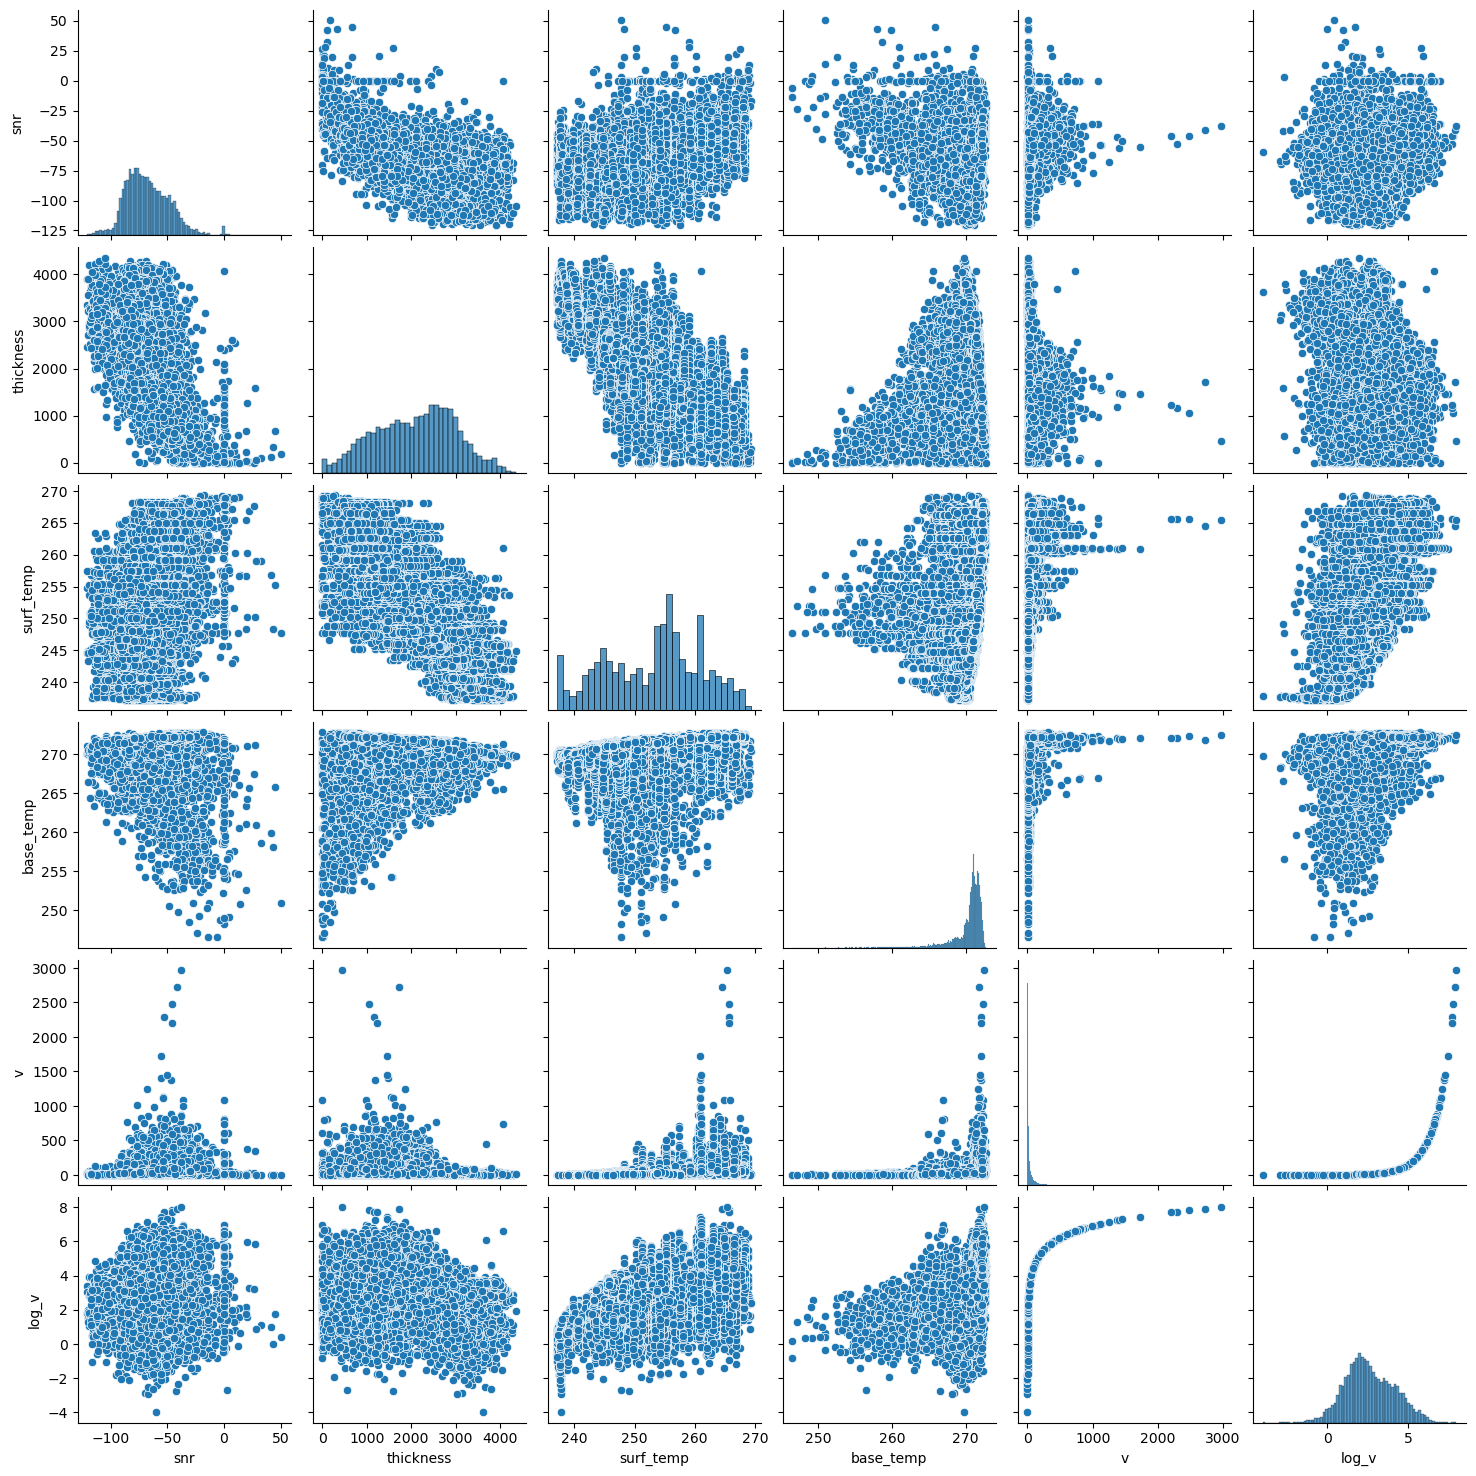

In [99]:
sns.pairplot(grounded_df[['snr', 'thickness', 'surf_temp', 
                          'base_temp','v', 'log_v']])

n < 100 = 14040
n >= 100 = 1783


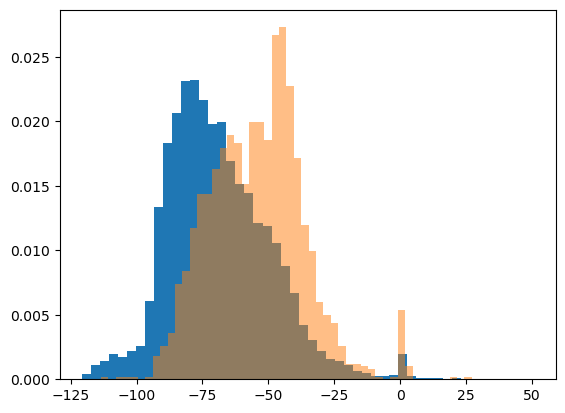

In [110]:
print(f"n < 100 = {len(grounded_df['snr'].loc[grounded_df['v']<100])}")
print(f"n >= 100 = {len(grounded_df['snr'].loc[grounded_df['v']>=100])}")
plt.hist(grounded_df['snr'].loc[grounded_df['v']<100], density=True,
         bins=50)
plt.hist(grounded_df['snr'].loc[grounded_df['v']>=100], density=True, 
         bins=50, alpha=0.5);

In [100]:
floating_df = test_df.loc[test_df['mask']==3]

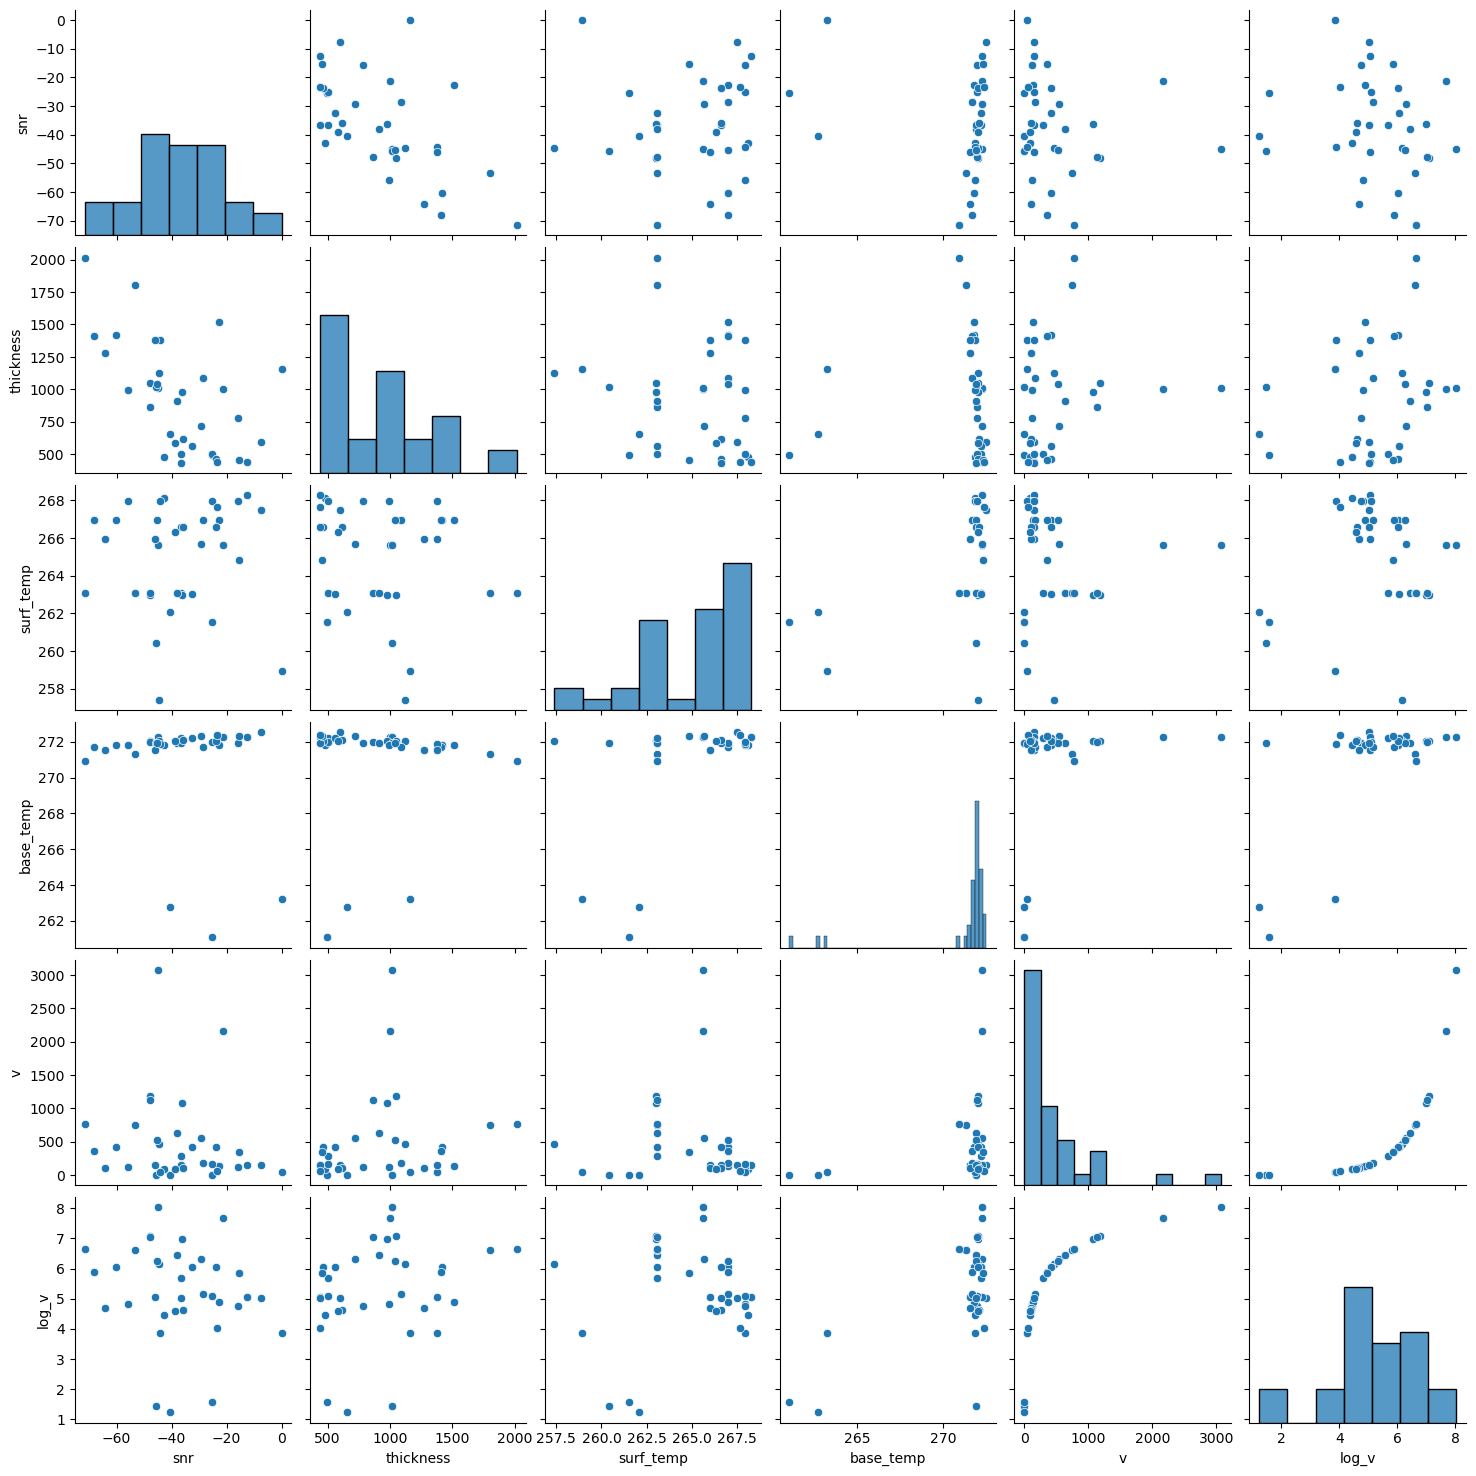

In [101]:
sns.pairplot(floating_df[['snr', 'thickness', 'surf_temp', 
                          'base_temp','v', 'log_v']])

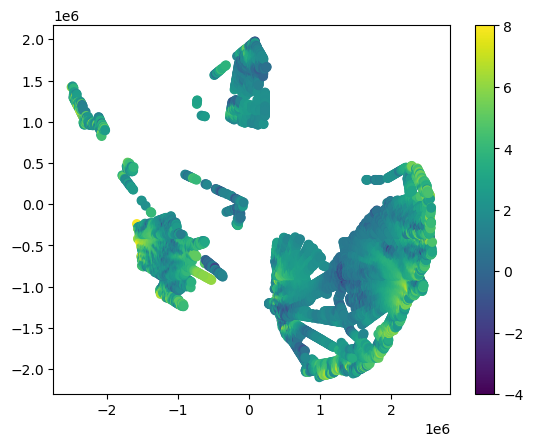

In [102]:
plt.scatter(test_df['x'], test_df['y'], c=test_df['log_v'])
plt.colorbar()

Some potential things to add:
1. Surface elevation
2. Distance from grounding line (take bedmachine grid, preprocess the distance from the middle of a cell to the closest distance to floating)
3. Wilson's lakes gridded to a coarse grid of percentage water within a square